# Problem Statment

Importing required libraries/modules:

In [3]:
#libraries to manipulate and calculate :
import os
import pandas as pd
import numpy as np
from datetime import datetime

#Libraries for visualisation:
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

#Modules/Functions for metrics:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score,f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

#Modules for pipeline
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

#Module to impute
from sklearn.impute import SimpleImputer

#Module to split to data
from sklearn.model_selection import train_test_split

#Module for standardisation
from sklearn.preprocessing import StandardScaler

#Module for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Libraries for ML model_building:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

#Module for OverSampling
from imblearn.over_sampling import SMOTE

#library for Tuning models:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
%matplotlib inline

#Module to ignore the warnings
import warnings
warnings.filterwarnings('ignore')

##Limiting floats output to 3 decimal points 
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


To get current working directory

In [329]:
os.getcwd()

'C:\\Users\\chiru\\Insofe Python Files\\Mani_MITH'

Changing the working directory

In [ ]:
os.chdir()

## Task-2 Load data.

Load data and create dataframe.

Initial data analysis.

In [4]:
#Read the given datasets
train_attr = pd.read_csv('train_attrition.csv',na_values=[" ","na","NA"])
test_attr = pd.read_csv('test_attrition.csv',na_values=[" ","na","NA"])
train_wrk = pd.read_csv('train_work.csv',na_values=[" ","na","NA"])
test_wrk = pd.read_csv('test_work.csv',na_values=[" ","na","NA"])
emp = pd.read_csv('employee_data.csv',na_values=[" ","na","NA"])

print(train_attr.shape)

(245, 2)


### Exploring the data

Shuffle the data.
Shuffle the data, if the data is ordered on the levels of target.
tennis_data = tennis_data.sample(frac=1)

In [5]:
# What are the data types?
train_wrk.dtypes

EmployeeID            object
TotalWorkingHours    float64
Billable_Hours       float64
Hours_off_Duty       float64
Touring_Hours        float64
NoOfProjects           int64
ActualTimeSpent        int64
dtype: object

In [6]:
# What is the distribution of numerical columns
train_wrk.describe()

,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent
count,3983.000,3983.000,3983.000,3983.000,3983.000,3983.000
mean,188.316,129.016,16.098,65.401,1.262,94.390
std,47.564,66.432,22.518,79.742,0.798,80.292
min,20.000,-2.000,0.000,0.000,0.000,0.000
25%,163.000,84.000,0.000,0.000,1.000,35.000
50%,188.800,145.000,8.000,0.000,1.000,77.000
75%,216.500,176.000,20.000,144.500,2.000,139.000
max,404.000,333.000,160.000,333.500,7.000,574.000


In [7]:
# What about categorical variable levels count
emp.describe(include=['object'])

,EmployeeID,Job_History,Joining_Date,Designation
count,296,296,296,296
unique,296,295,61,5
top,emp-190,Worked at Company - 616,2012_05,Junior
freq,1,2,19,89


In [8]:
#Get uniques values in attributes
emp.nunique()

EmployeeID      296
Job_History     295
Joining_Date     61
Designation       5
Sex               2
dtype: int64

In [9]:
#To get levels in a column 
emp.Designation.value_counts()

Junior    89
VP        83
Senior    75
EVP       36
MD        13
Name: Designation, dtype: int64

Distribution of dependent variable

In [10]:
#Distribution of dependent variable
bank_data.y.value_counts()

NameError: name 'bank_data' is not defined

In [11]:
#Glancing the head of the dataset
emp.head()

,EmployeeID,Job_History,Joining_Date,Designation,Sex
0,emp-10,"Worked at Company - 816 , Company - 724 , Comp...",2006_02,VP,0
1,emp-108,"Worked at Company - 205 , Company - 373 , Comp...",2012_01,VP,1
2,emp-115,"Worked at Company - 690 , Company - 280 , Comp...",2012_02,Senior,1
3,emp-121,"Worked at Company - 684 , Company - 159 , Comp...",2012_03,VP,1
4,emp-138,"Worked at Company - 443 , Company - 121 , Comp...",2012_05,Senior,1


In [12]:
# Check the distribution of target values
bank_data.y.value_counts(normalize=True)*100

NameError: name 'bank_data' is not defined

In [13]:
# Plot Distribution
sns.countplot(x='y',data=bank_data)
plt.show()

# What are the counts?
print(bank_data.y.value_counts())

# What is the percentage?
count_yes = len(bank_data[bank_data.y == 'yes'])
count_no = len(bank_data[bank_data.y != 'yes'])

percent_success = (count_yes/(count_yes + count_no))*100

print('Percentage of people who have taken the campaign:', percent_success, "%")

NameError: name 'bank_data' is not defined

In [14]:
train_attr.head(), train_attr.dtypes

(  EmployeeID  Left_Company
 0      emp-1         0.000
 1     emp-10         1.000
 2    emp-100         0.000
 3    emp-101         0.000
 4    emp-102         0.000, EmployeeID       object
 Left_Company    float64
 dtype: object)

In [15]:
test_attr.head(), test_attr.dtypes

(  EmployeeID  Left_Company
 0    emp-106           nan
 1    emp-112           nan
 2    emp-114           nan
 3    emp-118           nan
 4     emp-12           nan, EmployeeID       object
 Left_Company    float64
 dtype: object)

In [16]:
train_wrk.head()

,EmployeeID,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent
0,emp-1,184.000,144.000,40.000,144.000,3,77
1,emp-1,176.000,136.000,40.000,136.000,2,98
2,emp-1,200.000,120.000,72.000,120.000,1,14
3,emp-1,160.000,144.000,8.000,144.000,3,147
4,emp-1,171.000,135.000,0.000,135.000,1,42


In [17]:
test_wrk.head()

,EmployeeID,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent
0,emp-2,170.000,124.000,8.000,0.000,4,77
1,emp-2,164.000,114.000,24.000,0.000,4,105
2,emp-2,201.000,139.000,48.000,0.000,4,112
3,emp-2,153.000,114.000,24.000,0.000,2,91
4,emp-2,122.000,106.000,0.000,0.000,2,98


In [18]:
train_wrk.dtypes

EmployeeID            object
TotalWorkingHours    float64
Billable_Hours       float64
Hours_off_Duty       float64
Touring_Hours        float64
NoOfProjects           int64
ActualTimeSpent        int64
dtype: object

In [19]:
test_wrk.dtypes

EmployeeID            object
TotalWorkingHours    float64
Billable_Hours       float64
Hours_off_Duty       float64
Touring_Hours        float64
NoOfProjects           int64
ActualTimeSpent        int64
dtype: object

# Finding missing/null values

In [20]:
#To determine the missing/null values in the data
def Missing (X):
    total = X.isnull().sum().sort_values(ascending = False)
    percent = round(X.isnull().sum().sort_values(ascending = False)/len(X)*100, 2)
    missing = pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])
    return(missing) 

In [232]:
#Missing/null values in each dataset
print('missing in train_attrition:\n',Missing(train_attr),'\n')
print('missing in unseen_attrition:\n',Missing(test_attr),'\n')
print('missing in train_work:\n',Missing(train_wrk),'\n')
print('missing in test_work:\n',Missing(test_wrk),'\n')
print('missing in Employee:\n',Missing(emp),'\n')

missing in train_attrition:
               Total  Percent
Left_Company      0      0.0
EmployeeID        0      0.0 

missing in unseen_attrition:
               Total  Percent
Left_Company     51    100.0
EmployeeID        0      0.0 

missing in train_work:
                    Total  Percent
ActualTimeSpent        0      0.0
NoOfProjects           0      0.0
Touring_Hours          0      0.0
Hours_off_Duty         0      0.0
Billable_Hours         0      0.0
TotalWorkingHours      0      0.0
EmployeeID             0      0.0 

missing in test_work:
                    Total  Percent
ActualTimeSpent        0      0.0
NoOfProjects           0      0.0
Touring_Hours          0      0.0
Hours_off_Duty         0      0.0
Billable_Hours         0      0.0
TotalWorkingHours      0      0.0
EmployeeID             0      0.0 

missing in Employee:
               Total  Percent
Sex               0      0.0
Designation       0      0.0
Joining_Date      0      0.0
Job_History       0      0.0
E

In [5]:
#Aggregating data based on EmployeeID
train_wrk = train_wrk.groupby(['EmployeeID']).mean()

In [6]:
#Merging the 2 datasets
train_data=pd.merge(train_wrk,train_attr,on='EmployeeID',how='inner')

In [7]:
train_data.head()

,EmployeeID,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,Left_Company
0,emp-1,148.870,107.043,17.739,107.043,1.826,123.870,0.000
1,emp-10,182.364,115.818,29.818,62.818,1.182,56.000,1.000
2,emp-100,200.389,181.944,12.444,179.722,1.278,188.222,0.000
3,emp-101,241.735,162.324,11.294,0.000,1.059,114.882,0.000
4,emp-102,210.556,151.139,19.111,103.389,1.111,125.222,0.000


In [8]:
#Aggregating the testdata based on EmployeeID
test_wrk = test_wrk.groupby(['EmployeeID']).mean()

In [9]:
#Merging 2 datasets based on EmployeeID

test_data=pd.merge(test_wrk,test_attr,on='EmployeeID',how='inner')
test_data

,EmployeeID,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,Left_Company
0,emp-106,194.676,138.353,17.529,0.118,1.059,102.118,nan
1,emp-112,198.656,163.125,18.250,20.312,1.312,106.750,nan
2,emp-114,192.031,101.169,16.500,69.000,1.562,55.125,nan
3,emp-118,171.429,143.429,10.429,52.000,1.286,109.000,nan
4,emp-12,195.261,115.348,26.130,34.739,1.348,81.870,nan
5,emp-121,175.167,56.500,17.778,13.111,0.667,17.111,nan
6,emp-124,159.462,28.615,11.462,28.615,0.308,11.308,nan
7,emp-138,187.042,128.000,13.042,81.375,1.250,63.000,nan
8,emp-14,214.891,158.478,22.739,95.087,1.261,115.652,nan
9,emp-140,187.900,98.600,15.000,98.600,0.800,51.800,nan


In [10]:
train_data=pd.merge(train_data,emp,on='EmployeeID',how='inner')
train_data

,EmployeeID,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,Left_Company,Job_History,Joining_Date,Designation,Sex
0,emp-1,148.870,107.043,17.739,107.043,1.826,123.870,0.000,"Worked at Company - 639 , Company - 212 , Comp...",2011_01,MD,1
1,emp-10,182.364,115.818,29.818,62.818,1.182,56.000,1.000,"Worked at Company - 816 , Company - 724 , Comp...",2006_02,VP,0
2,emp-100,200.389,181.944,12.444,179.722,1.278,188.222,0.000,"Worked at Company - 562 , Company - 319",2011_12,Senior,1
3,emp-101,241.735,162.324,11.294,0.000,1.059,114.882,0.000,"Worked at Company - 212 , Company - 668 , Comp...",2012_01,Senior,1
4,emp-102,210.556,151.139,19.111,103.389,1.111,125.222,0.000,Worked at Company - 234,2011_12,Senior,1
...,...,...,...,...,...,...,...,...,...,...,...,...
240,emp-94,194.619,117.429,18.762,117.429,1.000,38.000,0.000,"Worked at Company - 71 , Company - 324 , Compa...",2011_09,Senior,0
241,emp-96,188.225,148.775,13.600,95.250,1.300,87.850,0.000,"Worked at Company - 27 , Company - 159",2011_10,Senior,1
242,emp-97,168.929,71.357,13.714,25.929,0.857,40.000,1.000,"Worked at Company - 789 , Company - 785 , Comp...",2011_10,Junior,0
243,emp-98,193.237,164.895,14.737,14.421,2.211,204.842,0.000,"Worked at Company - 817 , Company - 404 , Comp...",2011_11,Senior,1


In [11]:
test_data=pd.merge(test_data,emp,on='EmployeeID',how='inner')
test_data

,EmployeeID,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,Left_Company,Job_History,Joining_Date,Designation,Sex
0,emp-106,194.676,138.353,17.529,0.118,1.059,102.118,nan,"Worked at Company - 510 , Company - 658 , Comp...",2012_01,Senior,0
1,emp-112,198.656,163.125,18.250,20.312,1.312,106.750,nan,"Worked at Company - 42 , Company - 432 , Compa...",2012_02,VP,1
2,emp-114,192.031,101.169,16.500,69.000,1.562,55.125,nan,"Worked at Company - 99 , Company - 88 , Compan...",2012_02,EVP,1
3,emp-118,171.429,143.429,10.429,52.000,1.286,109.000,nan,"Worked at Company - 554 , Company - 304",2012_04,EVP,1
4,emp-12,195.261,115.348,26.130,34.739,1.348,81.870,nan,"Worked at Company - 548 , Company - 405",2006_09,VP,1
5,emp-121,175.167,56.500,17.778,13.111,0.667,17.111,nan,"Worked at Company - 684 , Company - 159 , Comp...",2012_03,VP,1
6,emp-124,159.462,28.615,11.462,28.615,0.308,11.308,nan,"Worked at Company - 745 , Company - 578 , Comp...",2012_05,VP,1
7,emp-138,187.042,128.000,13.042,81.375,1.250,63.000,nan,"Worked at Company - 443 , Company - 121 , Comp...",2012_05,Senior,1
8,emp-14,214.891,158.478,22.739,95.087,1.261,115.652,nan,"Worked at Company - 6 , Company - 724",2007_07,VP,0
9,emp-140,187.900,98.600,15.000,98.600,0.800,51.800,nan,"Worked at Company - 337 , Company - 384 , Comp...",2012_06,VP,1


In [12]:
#Extracting new feature from the existing feature(Job_History)
train_data['No_of_companies'] = train_data.Job_History.str.count("Company")
train_data

,EmployeeID,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,Left_Company,Job_History,Joining_Date,Designation,Sex,No_of_companies
0,emp-1,148.870,107.043,17.739,107.043,1.826,123.870,0.000,"Worked at Company - 639 , Company - 212 , Comp...",2011_01,MD,1,3
1,emp-10,182.364,115.818,29.818,62.818,1.182,56.000,1.000,"Worked at Company - 816 , Company - 724 , Comp...",2006_02,VP,0,4
2,emp-100,200.389,181.944,12.444,179.722,1.278,188.222,0.000,"Worked at Company - 562 , Company - 319",2011_12,Senior,1,2
3,emp-101,241.735,162.324,11.294,0.000,1.059,114.882,0.000,"Worked at Company - 212 , Company - 668 , Comp...",2012_01,Senior,1,3
4,emp-102,210.556,151.139,19.111,103.389,1.111,125.222,0.000,Worked at Company - 234,2011_12,Senior,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,emp-94,194.619,117.429,18.762,117.429,1.000,38.000,0.000,"Worked at Company - 71 , Company - 324 , Compa...",2011_09,Senior,0,4
241,emp-96,188.225,148.775,13.600,95.250,1.300,87.850,0.000,"Worked at Company - 27 , Company - 159",2011_10,Senior,1,2
242,emp-97,168.929,71.357,13.714,25.929,0.857,40.000,1.000,"Worked at Company - 789 , Company - 785 , Comp...",2011_10,Junior,0,6
243,emp-98,193.237,164.895,14.737,14.421,2.211,204.842,0.000,"Worked at Company - 817 , Company - 404 , Comp...",2011_11,Senior,1,4


In [13]:
test_data['No_of_companies'] = test_data.Job_History.str.count("Company")
test_data

,EmployeeID,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,Left_Company,Job_History,Joining_Date,Designation,Sex,No_of_companies
0,emp-106,194.676,138.353,17.529,0.118,1.059,102.118,nan,"Worked at Company - 510 , Company - 658 , Comp...",2012_01,Senior,0,4
1,emp-112,198.656,163.125,18.250,20.312,1.312,106.750,nan,"Worked at Company - 42 , Company - 432 , Compa...",2012_02,VP,1,3
2,emp-114,192.031,101.169,16.500,69.000,1.562,55.125,nan,"Worked at Company - 99 , Company - 88 , Compan...",2012_02,EVP,1,3
3,emp-118,171.429,143.429,10.429,52.000,1.286,109.000,nan,"Worked at Company - 554 , Company - 304",2012_04,EVP,1,2
4,emp-12,195.261,115.348,26.130,34.739,1.348,81.870,nan,"Worked at Company - 548 , Company - 405",2006_09,VP,1,2
5,emp-121,175.167,56.500,17.778,13.111,0.667,17.111,nan,"Worked at Company - 684 , Company - 159 , Comp...",2012_03,VP,1,6
6,emp-124,159.462,28.615,11.462,28.615,0.308,11.308,nan,"Worked at Company - 745 , Company - 578 , Comp...",2012_05,VP,1,4
7,emp-138,187.042,128.000,13.042,81.375,1.250,63.000,nan,"Worked at Company - 443 , Company - 121 , Comp...",2012_05,Senior,1,5
8,emp-14,214.891,158.478,22.739,95.087,1.261,115.652,nan,"Worked at Company - 6 , Company - 724",2007_07,VP,0,2
9,emp-140,187.900,98.600,15.000,98.600,0.800,51.800,nan,"Worked at Company - 337 , Company - 384 , Comp...",2012_06,VP,1,7


In [14]:
#Extracting new feature from the existing feature(Joining_Date)
import datetime
no_of_years=[]
now=pd.to_datetime('today')
year = now.year
yea_mon = train_data['Joining_Date'].str.split('_')
for i in range(0,len(yea_mon)):
    no_of_years.append(year - int(train_data['Joining_Date'].str.split('_')[i][0]))
no_of_years

[9,
 14,
 9,
 8,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 13,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 13,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 8,
 12,
 8,
 7,
 8,
 7,
 7,
 7,
 7,
 12,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 15,
 11,
 12,
 18,
 14,
 13,
 13,
 12,
 12,
 12,
 11,
 11,
 11,
 12,
 11,
 10,
 11,
 11,
 11,
 9,
 10,
 10,
 9,
 10,
 12,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 12,
 9,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 12,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 9,
 9,
 8,
 12,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 12,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 11,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 11,
 8,
 8,
 7,
 8,
 8,
 7,
 7,
 8,
 7,
 7,
 11,
 7,
 7,
 7,
 7,
 7,
 17,
 11,
 11,
 10,
 10,
 11,
 10,
 9,
 9,
 8,
 8,
 8,
 8,
 11,
 11,
 11,
 11,
 10,
 11,
 11,
 18,
 11,
 11,
 11,
 10,
 10,
 9,
 17,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 17,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 10,
 

In [15]:
train_data['years_in_company']=no_of_years

In [16]:
train_data

,EmployeeID,TotalWorkingHours,Billable_Hours,Hours_off_Duty,Touring_Hours,NoOfProjects,ActualTimeSpent,Left_Company,Job_History,Joining_Date,Designation,Sex,No_of_companies,years_in_company
0,emp-1,148.870,107.043,17.739,107.043,1.826,123.870,0.000,"Worked at Company - 639 , Company - 212 , Comp...",2011_01,MD,1,3,9
1,emp-10,182.364,115.818,29.818,62.818,1.182,56.000,1.000,"Worked at Company - 816 , Company - 724 , Comp...",2006_02,VP,0,4,14
2,emp-100,200.389,181.944,12.444,179.722,1.278,188.222,0.000,"Worked at Company - 562 , Company - 319",2011_12,Senior,1,2,9
3,emp-101,241.735,162.324,11.294,0.000,1.059,114.882,0.000,"Worked at Company - 212 , Company - 668 , Comp...",2012_01,Senior,1,3,8
4,emp-102,210.556,151.139,19.111,103.389,1.111,125.222,0.000,Worked at Company - 234,2011_12,Senior,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,emp-94,194.619,117.429,18.762,117.429,1.000,38.000,0.000,"Worked at Company - 71 , Company - 324 , Compa...",2011_09,Senior,0,4,9
241,emp-96,188.225,148.775,13.600,95.250,1.300,87.850,0.000,"Worked at Company - 27 , Company - 159",2011_10,Senior,1,2,9
242,emp-97,168.929,71.357,13.714,25.929,0.857,40.000,1.000,"Worked at Company - 789 , Company - 785 , Comp...",2011_10,Junior,0,6,9
243,emp-98,193.237,164.895,14.737,14.421,2.211,204.842,0.000,"Worked at Company - 817 , Company - 404 , Comp...",2011_11,Senior,1,4,9


In [17]:
test_data.columns

Index(['EmployeeID', 'TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent', 'Left_Company',
       'Job_History', 'Joining_Date', 'Designation', 'Sex', 'No_of_companies'],
      dtype='object')

In [18]:
import datetime
no_of_years=[]
now=pd.to_datetime('today')
year = now.year
yea_mon = test_data['Joining_Date'].str.split('_')
for i in range(0,len(yea_mon)):
    no_of_years.append(year - int(test_data['Joining_Date'].str.split('_')[i][0]))
no_of_years

test_data['years_in_company']=no_of_years

In [19]:
test_data.columns

Index(['EmployeeID', 'TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent', 'Left_Company',
       'Job_History', 'Joining_Date', 'Designation', 'Sex', 'No_of_companies',
       'years_in_company'],
      dtype='object')

In [20]:
test_data['Left_Company']=test_data['Left_Company'].astype('category')
test_data['Sex']=test_data['Sex'].astype('category')
test_data['Designation']=test_data['Designation'].astype('category')

In [21]:
test_data.dtypes

EmployeeID             object
TotalWorkingHours     float64
Billable_Hours        float64
Hours_off_Duty        float64
Touring_Hours         float64
NoOfProjects          float64
ActualTimeSpent       float64
Left_Company         category
Job_History            object
Joining_Date           object
Designation          category
Sex                  category
No_of_companies         int64
years_in_company        int64
dtype: object

In [22]:
train_data['Left_Company']=train_data['Left_Company'].astype('category')
train_data['Sex']=train_data['Sex'].astype('category')

In [23]:
train_data.dtypes

EmployeeID             object
TotalWorkingHours     float64
Billable_Hours        float64
Hours_off_Duty        float64
Touring_Hours         float64
NoOfProjects          float64
ActualTimeSpent       float64
Left_Company         category
Job_History            object
Joining_Date           object
Designation            object
Sex                  category
No_of_companies         int64
years_in_company        int64
dtype: object

# Categorical and Numerical attributes

In [24]:
num_col=train_data.select_dtypes(exclude=['category', 'object']).columns
num_col

Index(['TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent', 'No_of_companies',
       'years_in_company'],
      dtype='object')

In [25]:
cat_col=train_data.select_dtypes(include=['category', 'object']).columns

In [26]:
train_data.shape

(245, 14)

In [27]:
test_num_col=test_data.select_dtypes(exclude=['category', 'object']).columns
test_num_col

Index(['TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent', 'No_of_companies',
       'years_in_company'],
      dtype='object')

# Removal of Outliers using quantiles

# Replacing of outliers with whiskers 

In [ ]:
#User defined function to replace Outliers with whiskers
def Outlier_removal(train_data,num_col):
    for i in range(0,train_data[num_col].shape[1]):
        Q0 = train_data[num_col[i]].quantile(0.01)
        Q1 = train_data[num_col[i]].quantile(0.25)
        Q3 = train_data[num_col[i]].quantile(0.75)
        Q4 = train_data[num_col[i]].quantile(1)
        IQR = Q3 - Q1
        Lower_whisker = Q1 - 1.5 * IQR
        Upper_whisker = Q3 + 1.5 * IQR
        Outliers_counts = len((train_data[num_col[i]][train_data[num_col[i]] < Lower_whisker ]) + (train_data[num_col[i]] [train_data[num_col[i]] > Upper_whisker]))
        print("Outliers counts in", num_col[i], Outliers_counts)
        train_data.loc[(train_data[num_col[i]] < Lower_whisker),num_col[i]] = Lower_whisker
        train_data.loc[(train_data[num_col[i]] > Upper_whisker),num_col[i]] = Upper_whisker

In [ ]:
Outlier_removal(train_data,num_col)

In [ ]:
train_data.dtypes

In [28]:
#Dropping unnecessary columns
train_data.drop(['EmployeeID','Job_History','Joining_Date'],axis=1,inplace=True)
train_data.dtypes

TotalWorkingHours     float64
Billable_Hours        float64
Hours_off_Duty        float64
Touring_Hours         float64
NoOfProjects          float64
ActualTimeSpent       float64
Left_Company         category
Designation            object
Sex                  category
No_of_companies         int64
years_in_company        int64
dtype: object

In [29]:
test_data.drop(['EmployeeID','Job_History','Joining_Date'],axis=1,inplace=True)
test_data.dtypes

TotalWorkingHours     float64
Billable_Hours        float64
Hours_off_Duty        float64
Touring_Hours         float64
NoOfProjects          float64
ActualTimeSpent       float64
Left_Company         category
Designation          category
Sex                  category
No_of_companies         int64
years_in_company        int64
dtype: object

In [30]:
cat_col=train_data.select_dtypes(include=['category', 'object']).columns
cat_col

Index(['Left_Company', 'Designation', 'Sex'], dtype='object')

In [31]:
test_cat_col=test_data.select_dtypes(include=['category', 'object']).columns
test_cat_col

Index(['Left_Company', 'Designation', 'Sex'], dtype='object')

In [32]:
test_data[test_cat_col] = test_data[test_cat_col].astype('category')
test_cat_col = test_cat_col.drop(['Left_Company'])

In [49]:
test_data.dtypes

TotalWorkingHours     float64
Billable_Hours        float64
Hours_off_Duty        float64
Touring_Hours         float64
NoOfProjects          float64
ActualTimeSpent       float64
Left_Company         category
Designation          category
Sex                  category
No_of_companies         int64
years_in_company        int64
dtype: object

In [50]:
train_data[cat_col] = train_data[cat_col].astype('category')


In [51]:
train_data.dtypes

TotalWorkingHours     float64
Billable_Hours        float64
Hours_off_Duty        float64
Touring_Hours         float64
NoOfProjects          float64
ActualTimeSpent       float64
Left_Company         category
Designation          category
Sex                  category
No_of_companies         int64
years_in_company        int64
dtype: object

# Split data into train and test sets

- Use `train_test_split` method from `sklearn.model_selection` module.

In [33]:
#Splitting the data
from sklearn.model_selection import train_test_split  
X_train=train_data.drop(['Left_Company'], axis='columns')
y_train = train_data['Left_Company']
X_train, X_test, y_train, y_test = train_test_split(X_train, 
                                                    y_train, 
                                                   train_size=0.7, 
                                                    test_size=0.3,
                                                    random_state=0)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((171, 10), (74, 10), (171,), (74,))

In [266]:
train_data.columns


Index(['TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent', 'Left_Company',
       'Designation', 'Sex', 'No_of_companies', 'years_in_company'],
      dtype='object')

In [267]:
test_data.columns

Index(['TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent', 'Left_Company',
       'Designation', 'Sex', 'No_of_companies', 'years_in_company'],
      dtype='object')

## Visualization

Get Correlations between the columns

In [353]:
threshold = 0.90

# Absolute value correlation matrix
corr_matrix = train_data.corr().abs()
print(corr_matrix.head())

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
print(upper.head())
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to remove.' % (len(to_drop)))

                   TotalWorkingHours  Billable_Hours  Hours_off_Duty  \
TotalWorkingHours           1.000000        0.732554        0.088258   
Billable_Hours              0.732554        1.000000        0.187555   
Hours_off_Duty              0.088258        0.187555        1.000000   
Touring_Hours               0.258703        0.340510        0.116828   
NoOfProjects                0.273160        0.360472        0.078916   

                   Touring_Hours  NoOfProjects  ActualTimeSpent  \
TotalWorkingHours       0.258703      0.273160         0.488958   
Billable_Hours          0.340510      0.360472         0.664185   
Hours_off_Duty          0.116828      0.078916         0.056252   
Touring_Hours           1.000000      0.084931         0.237035   
NoOfProjects            0.084931      1.000000         0.460081   

                   No_of_companies  years_in_company  
TotalWorkingHours         0.035785          0.183283  
Billable_Hours            0.021143          0.032939  

### Heat Plot

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add titleprint("Model: logistic regression, Train Error:{}, Test Error:{}", format(lgr.score(X_train, y_train),lgr.score(X_test, y_test)))
plt.title("Percentage change in Attributes")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=Bank.iloc[:,:].pct_change(), annot=True)
#sns.heatmap(data=stocks_data_avg.drop(['Week', "Year"], axis=1).pct_change(),annot=True)

plt.show()

# heatmaps are used to view the change in the values on a gradient.
# In this case, we see the percentage change in average stock price across weeks

In [ ]:
corr = Bank.corr()
#corr = stocks_data.drop(['Date','Week','Year'], axis=1).corr()
#1
# plt.figure(figsize=(12, 12))
# sns.heatmap(corr, 
#             annot = True)
# plt.show()

#2
# plt.figure(figsize=(12, 12))
# matrix = np.triu(corr)
# sns.heatmap(corr, annot=True, mask=matrix)
# plt.show()

3
plt.figure(figsize=(20,20))
#matrix = np.tril(corr)
sns.heatmap(corr, annot=True)
plt.show()

###  Target value distribution.
- See how the target value is distributed both in train and validation sets.

To check train and test target distribution

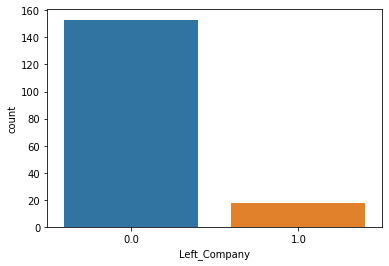

In [354]:
# Function to check the train and validation sets target distributions.
def fn_target_dist(series):
    # Find the counts in each class.
    vcdf = series.value_counts()
    # Convert above to a dataframe.
    vcdf = vcdf.to_frame(name = 'count')
    # Add a new column 'percentage' that gives percentage of level counts.
    vcdf['count%'] = round(100 * vcdf['count']/len(series), 2)

    # Return the target counts dataframe.
    return vcdf
# train target distribution
train_target_dist = fn_target_dist(y_train)
train_target_dist

ax = train_target_dist.plot.bar(y='count%', rot=0)

valid_target_dist = fn_target_dist(y_valid)
valid_target_dist

train_valid_target_dist = pd.merge(train_target_dist, 
                                   valid_target_dist, 
                                   left_index=True,
                                   right_index=True)
train_valid_target_dist

ax = train_valid_target_dist[['count%_x', 'count%_y']].plot.bar(rot=0)

#Check the distribution of Target
sns.countplot(x=y_train)
plt.show()

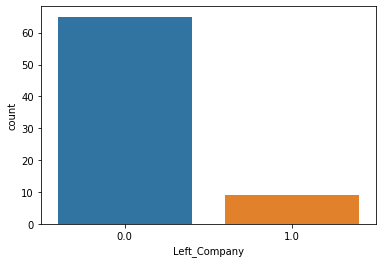

In [362]:
sns.countplot(x=y_test)
plt.show()

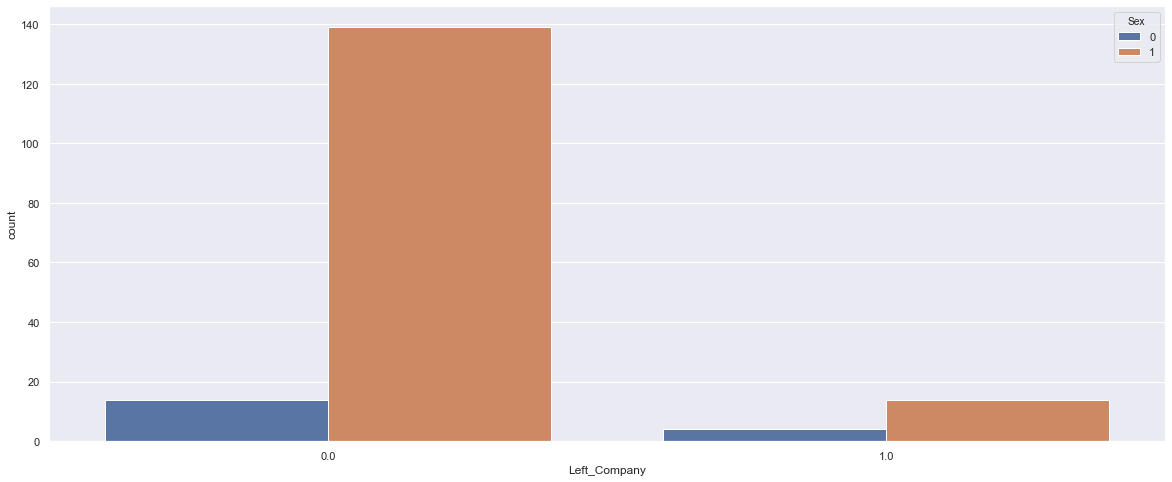

In [388]:
#Check the distribution of Target with respect to other variables
sns.countplot(x=y_train, 
              hue="Sex", 
              data=X_train)

plt.show()

<AxesSubplot:xlabel='Left_Company'>

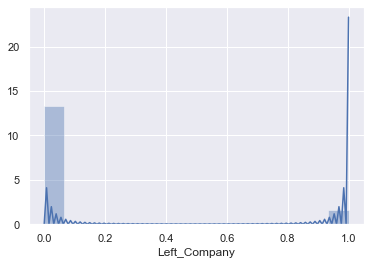

In [389]:
import seaborn as sns
%matplotlib inline
sns.distplot(train_data['Left_Company'])

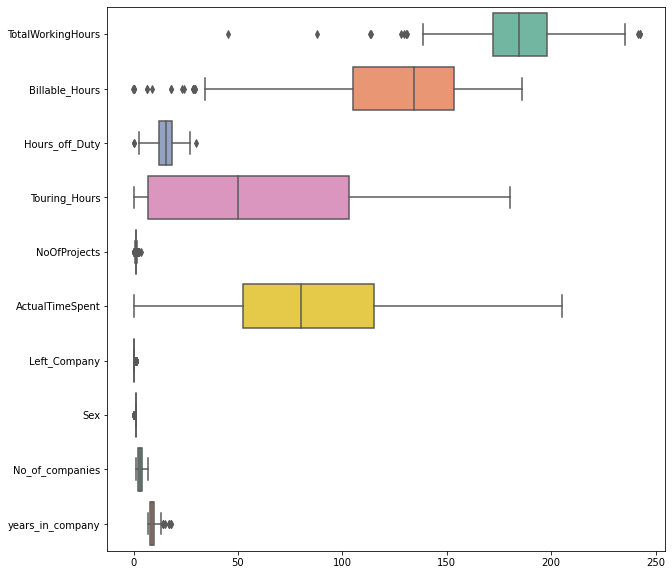

In [103]:
#Boxplot to get the distribution of numerical variables
fig, axs = plt.subplots(figsize = (10,10))
sns.boxplot(data=train_data,orient='h',palette="Set2")
plt.show()

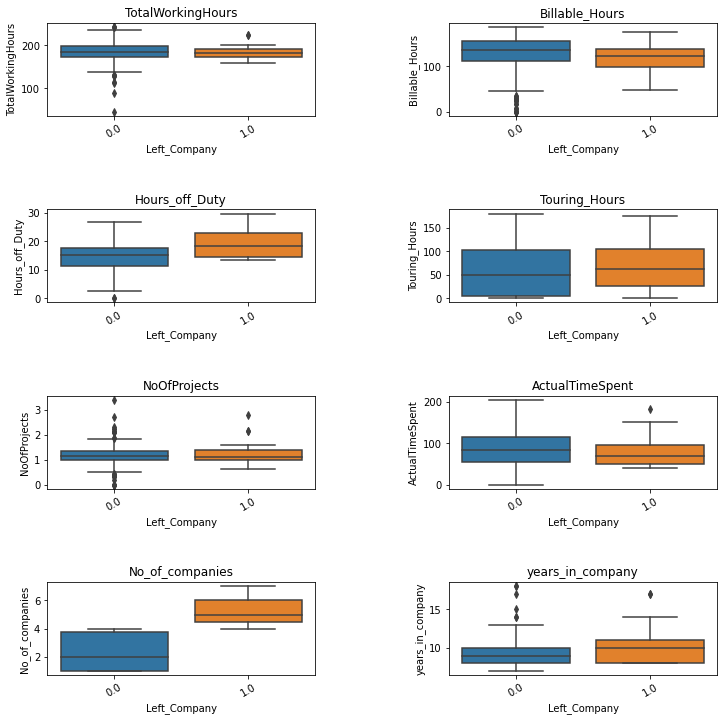

In [104]:
#Boxplot to get the distribution of numerical variables with respect to Target
fig=plt.figure(figsize=(12,12))
fig.subplots_adjust(wspace=0.5,hspace=1)
num_columns=train_data.select_dtypes(exclude=['category','object']).columns

for i,value in enumerate(num_columns):
    plt.subplot(4,2,i+1)
    plt.xticks(rotation=30)
    plt.title(value)
    sns.boxplot(x='Left_Company',y=value,data=train_data)
plt.show()

In [ ]:
## Outlier detection and implementing with whiskers
## Appliying Tukey's method to deal with outliers

q75, q25 = np.percentile(train_data["TotalWorkingHours"], [75 ,25])

iqr = q75-q25

print("IQR",iqr)

whisker_lower_Total = q25 - (1.5*iqr)
whisker_upper_Total = q75 + (1.5*iqr)

print("lower whisker",whisker_lower_Total)
print("upper whisker",whisker_upper_Total)

In [ ]:
train_data["TotalWorkingHours"] = train_data["TotalWorkingHours"].clip(lower = whisker_lower_Total)

In [ ]:
sns.countplot(x='Designation',data=train_data)

In [ ]:
#train_data.set_index('EmployeeID',inplace=True)
#train_data.drop(['Job_History'],inplace=True,axis=1)
train_data.columns


In [356]:
X_train.columns

Index(['TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent', 'Designation',
       'Sex', 'No_of_companies', 'years_in_company'],
      dtype='object')

In [ ]:
list(train_data.select_dtypes(include=['category','object']).columns)


Understand the other columns distribution with the target.

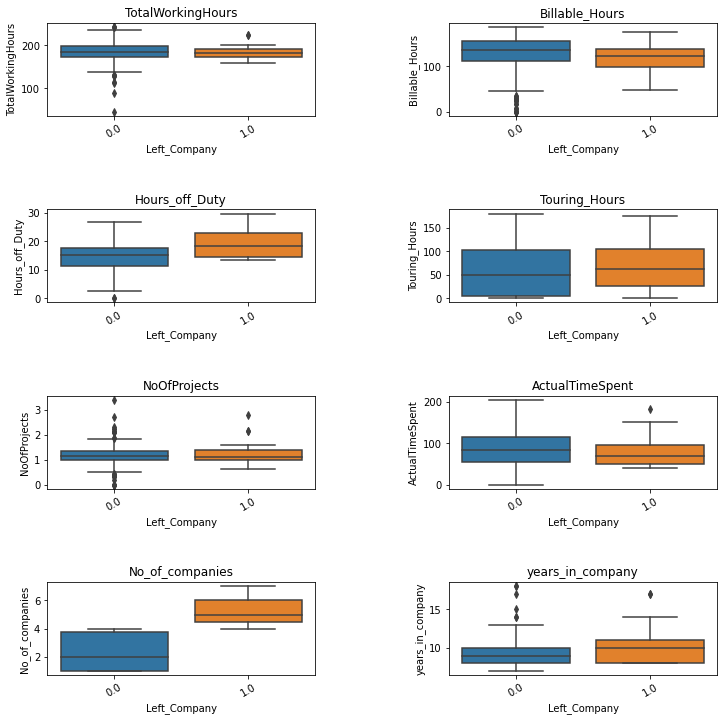

In [118]:
#sns.boxplot(x='Attrition',y='Age',data=data)
fig=plt.figure(figsize=(12,12))
fig.subplots_adjust(wspace=0.5,hspace=1)
num_columns=train_data.select_dtypes(exclude=['category','object']).columns

for i,value in enumerate(num_columns):
    plt.subplot(4,2,i+1)
    plt.xticks(rotation=30)
    plt.title(value)
    sns.boxplot(x='Left_Company',y=value,data=train_data)
plt.show()

Other categorical columns distribution based on the target.

In [366]:
cat_col

Index(['Designation', 'Sex'], dtype='object')

<AxesSubplot:xlabel='Sex', ylabel='count'>

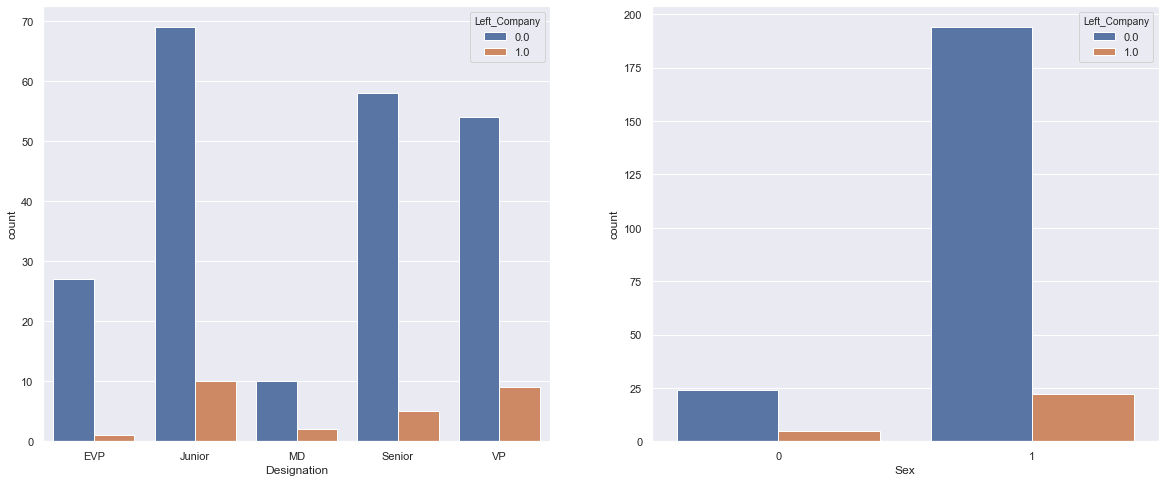

In [382]:
# for col in categorical_columns:
#     if col!='went_on_backorder':
#         sns.countplot(x = col, hue='went_on_backorder',data = plot_data)
#         plt.show()


fig, axs = plt.subplots(nrows = 1, ncols=2)
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot(x = cat_col[0], hue='Left_Company', data = train_data, ax=axs[0])
sns.countplot(x = cat_col[1], hue='Left_Company', data = train_data, ax=axs[1])


<Figure size 504x504 with 0 Axes>

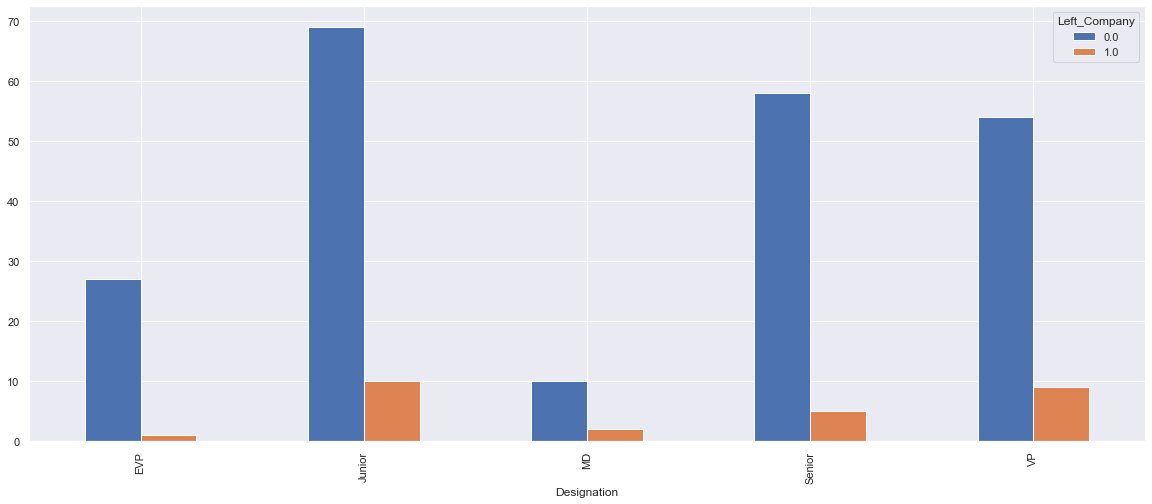

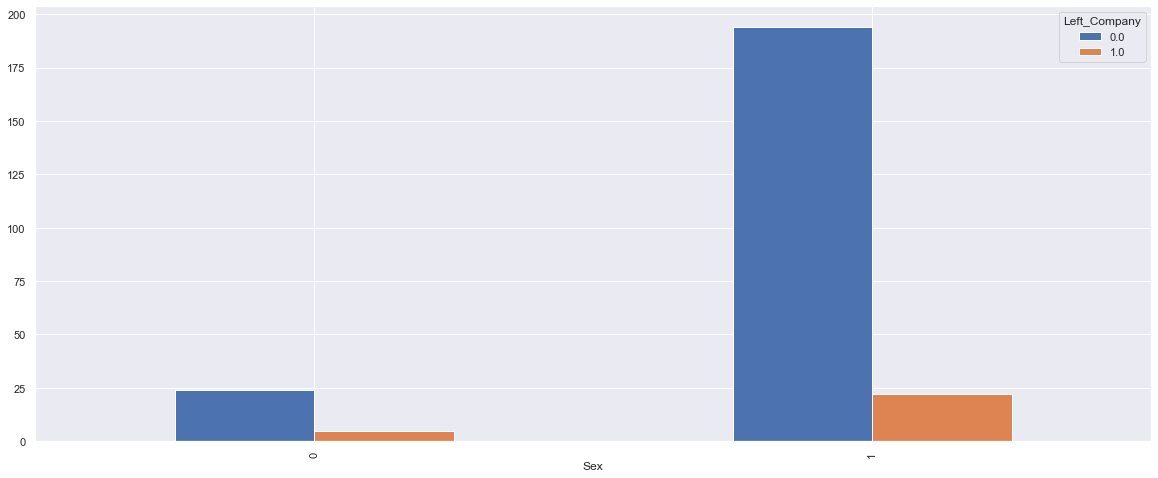

In [383]:
#target distribution in categorical columns 
fig = plt.figure(figsize=(7,7))
fig.subplots_adjust(wspace=0.5,hspace=1)
cat_columns=list(train_data.select_dtypes(include=['category','object']).columns)
for value in cat_columns:
    if value!= 'Left_Company':
        data_plot=pd.crosstab(train_data[value],train_data['Left_Company'])
        #print(data_plot)
        data_plot.plot(kind='bar')
        plt.xticks(rotation=90)
        plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

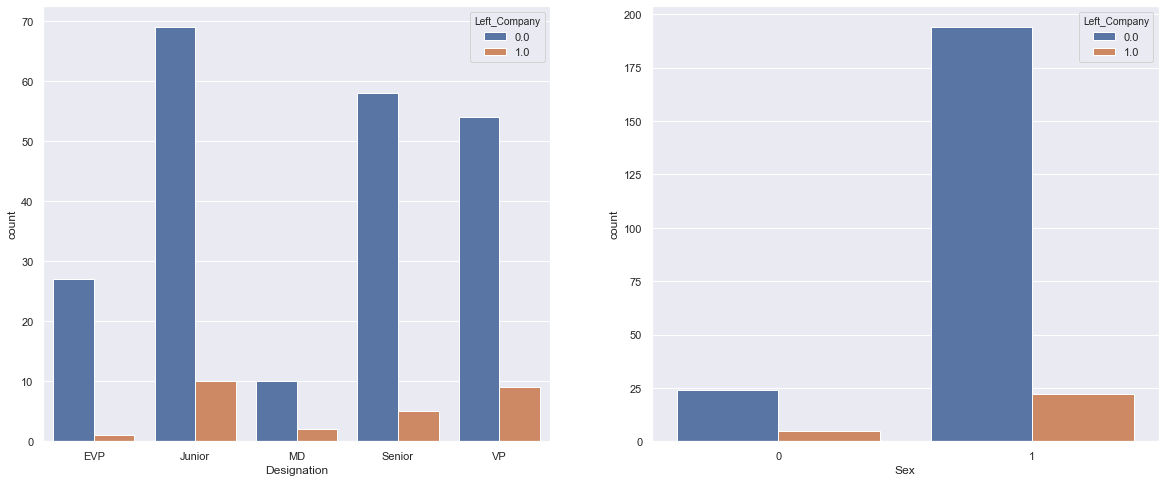

In [384]:
# for col in categorical_columns:
#     if col!='went_on_backorder':
#         sns.countplot(x = col, hue='went_on_backorder',data = plot_data)
#         plt.show()


fig, axs = plt.subplots(nrows = 1, ncols=2)
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot(x = cat_col[0], hue='Left_Company', data = train_data, ax=axs[0])
sns.countplot(x = cat_col[1], hue='Left_Company', data = train_data, ax=axs[1])

In [ ]:
import plotly.express as px
px.box(train_data, x="Left_Company", y="Designation",color='Sex')

Other columns distribution based on the target.

In [ ]:
import plotly.express as px
fig = px.bar(train_data, y="Sex", x="Designation",color='Left_Company')
fig

In [ ]:
fig = px.bar(train_data, y="Sex", x="TotalWorkingHours",color='Left_Company')
fig

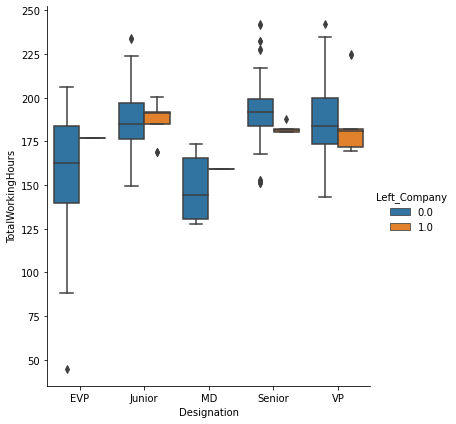

In [365]:
sns.catplot(x="Designation", y="TotalWorkingHours",
                hue="Left_Company",
                data=train_data, kind="box",
                height=6, aspect=.9);

In [ ]:
## DATA VISUALIZATION

sns.countplot(x="Left_Company",data=test_data)
#test_data["Left_Company"].value_counts()

# Encode categorical columns.

In [ ]:
X_train.replace(['No','Yes'],[0,1],inplace=True)
X_test.replace(['No','Yes'],[0,1],inplace=True)
y_train.replace(['No','Yes'],[0,1],inplace=True)
y_test.replace(['No','Yes'],[0,1],inplace=True)

# Pipeline

In [ ]:
Metric

In [271]:
cat_col = cat_col.drop(['Left_Company'])
cat_col

Index(['Designation', 'Sex'], dtype='object')

### Classes used in Pipeline

- Use `SimpleImputer` class from `sklearn.impute` module,impute with the median for numeric columns and with mode for categorical columns
- Use `StandardScale` class from `sklearn.preprocessing` module to standardize the columns
- Use `OneHotEncoder` class from `sklearn.preprocessing` module to convert the categorical variables to the numerical variables

In [346]:
#Function to normalise the data
def logtransf_normalize_func(X_train):
    for i in range(0,X_train.shape[1]):
            upper = X_train[col[i]].max()
            lower = X_train[col[i]].min()
            X_train[col[i]] = (X_train[col[i]] - lower)/(upper-lower)
            X_train[col[i]] = np.log(2+X_train[col[i]])

In [35]:
# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('num_scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_onehotencode', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num_trf', numeric_transformer, num_col),
        ('cat_trf', categorical_transformer, cat_col)])



# OnehotEncoding

In [99]:
num_col

Index(['TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent', 'No_of_companies',
       'years_in_company'],
      dtype='object')

In [37]:
cat_col = ['Designation', 'Sex']

In [38]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[cat_col]))
OH_cols_test  = pd.DataFrame(OH_encoder.transform(X_test[cat_col]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

# One-hot encoding assigns the sequence numbers as the columns names.
OH_cols_train.columns = OH_encoder.get_feature_names()
OH_cols_test.columns  = OH_encoder.get_feature_names()

# Add one-hot encoded columns to imputed numerical features
Final_X_train = pd.concat([X_train[num_col], OH_cols_train], axis=1)
Final_X_test  = pd.concat([X_test[num_col], OH_cols_test], axis=1)

# Compute metrics

- Compute accuracy, precision, recall and f1-score.
- Using functions accuracy_score,recall_score,precision_score,f1_score available in sklearn.metrics module.

In [42]:
# Function to append classification metrics into a dataframe
global Metric
Metric = pd.DataFrame(columns=['Model','Accuray','precision_class0','precision_class1','recall_class0','recall_class1','f1_class0','f1_class1'])

def Metric_append(metric,y_train,train_pred):
    Metric = Metric.append(pd.Series([model_name,accuracy_score(y_train,train_pred), precision_score(y_train,train_pred,average = None)[0], 
                            precision_score(y_train,train_pred,average = None)[1],
                           recall_score(y_train,train_pred,average = None)[0],recall_score(y_train,train_pred,average = None)[1], 
                           f1_score(y_train,train_pred,average = None)[0],
                 f1_score(y_train,train_pred,average = None)[1]], index=Metric.columns ), ignore_index=True)

    return Metric

#Function for model evaluation
def model_evaluation(y_train, train_pred, y_test, pred_test):
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================''')
    print(classification_report(y_train, train_pred))
    
    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================''')
    print(classification_report(y_test, pred_test))
    
    

In [ ]:
scoring = make_scorer(
                                    lambda yt,yp: f1_score(yt,yp,pos_label = 1)))

# Model Building

In [274]:
#Building linear logistic model
clf_logreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

In [275]:
%%time
#fitting the data to the linear model
clf_logreg.fit(X_train, y_train)


Wall time: 18.9 ms


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_trf',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  Index(['TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent', 'No_of_companies',
       'years_in_company'],
      dtype='object')),
                                                 ('cat_trf',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                         

In [276]:
#Predicting with the linear model
train_pred = clf_logreg.predict(X_train)
test_pred = clf_logreg.predict(X_test)

#Appending metrics in a dataframe
Metric_append('clf_logreg_train',y_train,train_pred)
Metric_append('clf_logreg_test',y_test,test_pred)

#displaying metrics
model_evaluation(y_train, train_pred, y_test, test_pred)


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       153
         1.0       1.00      0.72      0.84        18

    accuracy                           0.97       171
   macro avg       0.98      0.86      0.91       171
weighted avg       0.97      0.97      0.97       171


               CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        65
         1.0       1.00      0.56      0.71         9

    accuracy                           0.95        74
   macro avg       0.97      0.78      0.84        74
weighted avg       0.95      0.95      0.94        74



In [277]:
%%time
#Calling pipeline to perform preprocessing and DecisionTreeClassifier model

clf_dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

#Parameters used in GridSearch Cv
dt_param_grid = {'classifier__criterion': ['entropy'],
 'classifier__max_depth': [6],
 'classifier__min_samples_leaf': [10],
 'classifier__min_samples_split': [2]}

#Perform GridSearch cross validation
dt_grid = GridSearchCV(clf_dt, param_grid=dt_param_grid, cv=5,verbose=3,scoring = makescorer(precision_score))

#Fitting the model to the data
dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] classifier__criterion=entropy, classifier__max_depth=6, classifier__min_samples_leaf=10, classifier__min_samples_split=2 
[CV]  classifier__criterion=entropy, classifier__max_depth=6, classifier__min_samples_leaf=10, classifier__min_samples_split=2, score=1.000, total=   0.0s
[CV] classifier__criterion=entropy, classifier__max_depth=6, classifier__min_samples_leaf=10, classifier__min_samples_split=2 
[CV]  classifier__criterion=entropy, classifier__max_depth=6, classifier__min_samples_leaf=10, classifier__min_samples_split=2, score=0.971, total=   0.0s
[CV] classifier__criterion=entropy, classifier__max_depth=6, classifier__min_samples_leaf=10, classifier__min_samples_split=2 
[CV]  classifier__criterion=entropy, classifier__max_depth=6, classifier__min_samples_leaf=10, classifier__min_samples_split=2, score=1.000, total=   0.0s
[CV] classifier__criterion=entropy, classifier__max_depth=6, classifier__min_samples_leaf=10, c

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_trf',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('num_scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent', 'No_of_companies',
       'years_in_company'],...
                                                                                          SimpleImputer(strategy='most_frequent')),
                  

In [278]:
#Displaying the best parameters based on the metric score
dt_grid.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 6,
 'classifier__min_samples_leaf': 10,
 'classifier__min_samples_split': 2}

In [279]:
#Displaying the best estimator
dt_grid.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_trf',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  Index(['TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent', 'No_of_companies',
       'years_in_company'],
      dtype='object')),
                                                 ('cat_trf',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                         

In [280]:
#Predicting with the linear model
train_pred = dt_grid.predict(X_train)
test_pred = dt_grid.predict(X_test)

#Appending metrics in a dataframe
Metric_append('dt_grid_train',y_train,train_pred)
Metric_append('dt_grid_test',y_test,test_pred)

# Using the function to calculate accuracy, precision and recall.
model_evaluation(y_train, train_pred, y_test, test_pred)


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       153
         1.0       1.00      0.78      0.88        18

    accuracy                           0.98       171
   macro avg       0.99      0.89      0.93       171
weighted avg       0.98      0.98      0.98       171


               CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        65
         1.0       1.00      0.67      0.80         9

    accuracy                           0.96        74
   macro avg       0.98      0.83      0.89        74
weighted avg       0.96      0.96      0.96        74



In [281]:
#Calling pipeline to perform preprocessing and RandomForestClassifier model
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(class_weight='balanced'))])

In [282]:
#StratifiedKFold maintains target distribution while splitting
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)

#Parameters used in GridSearch Cv
param_grid = {"classifier__n_estimators" : [150],
              "classifier__max_depth" : [5],
              "classifier__max_features" : [7],
              "classifier__min_samples_leaf" : [4],
                "classifier__min_samples_split" : [2, 10, 20]}

#Perform GridSearch cross validation
rf_grid = GridSearchCV(clf, param_grid=param_grid, cv=kfold)

In [283]:
%%time
#Fitting the model to the data
rf_grid.fit(X_train,y_train)

Wall time: 2.01 s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=143, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_trf',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('num_scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects',...
                                                                                         ('cat_onehotencode',
                                                

In [284]:
#Displaying the best parameters based on the metric score
rf_grid.best_params_

{'classifier__max_depth': 5,
 'classifier__max_features': 7,
 'classifier__min_samples_leaf': 4,
 'classifier__min_samples_split': 20,
 'classifier__n_estimators': 150}

# To get the importance of every feature

In [285]:
#Predicting with the linear model
train_pred = rf_grid.predict(X_train)
test_pred = rf_grid.predict(X_test)

#Appending metrics in a dataframe
Metric_append('rf_grid_train',y_train,train_pred)
Metric_append('rf_grid_test',y_test,test_pred)


# Using the function to calculate accuracy, precision and recall.
model_evaluation(y_train, train_pred, y_test, test_pred)


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       153
         1.0       1.00      0.94      0.97        18

    accuracy                           0.99       171
   macro avg       1.00      0.97      0.98       171
weighted avg       0.99      0.99      0.99       171


               CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        65
         1.0       1.00      0.67      0.80         9

    accuracy                           0.96        74
   macro avg       0.98      0.83      0.89        74
weighted avg       0.96      0.96      0.96        74



In [286]:
#Calling pipeline to perform preprocessing and RandomForestClassifier model
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(min_samples_split=10,class_weight='balanced'))])

In [287]:
#Use StratifiedKFold to balance the target distribution while spliting
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=143)

param_grid = {'classifier__max_depth': [5],
 'classifier__max_features': [7],
 'classifier__min_samples_leaf': [4],
 'classifier__n_estimators': [150]
}

rf_grid2 = GridSearchCV(clf, param_grid=param_grid, cv=kfold)

In [288]:
rf_grid2.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=143, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_trf',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('num_scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects',...
                                                                                          SimpleImputer(strategy='most_frequent')),
                          

In [289]:
#Predicting and computing metrics
train_pred = rf_grid2.predict(X_train)
test_pred = rf_grid2.predict(X_test)

Metric_append('rf_grid2_train',y_train,train_pred)
Metric_append('rf_grid2_test',y_test,test_pred)


# Using the function to calculate accuracy, precision and recall.
model_evaluation(y_train, train_pred, y_test, test_pred)


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       153
         1.0       1.00      1.00      1.00        18

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171


               CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        65
         1.0       1.00      0.67      0.80         9

    accuracy                           0.96        74
   macro avg       0.98      0.83      0.89        74
weighted avg       0.96      0.96      0.96        74



In [291]:
%%time
#Building GBC model
clf_gbm = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',GradientBoostingClassifier())])

gbm_param_grid = {'classifier__max_depth': [8],
 'classifier__max_features': [0.3],
 'classifier__n_estimators': [30],
 'classifier__subsample': [0.8]}

gbm_grid = GridSearchCV(clf_gbm, param_grid=gbm_param_grid, cv=3,n_jobs=6)

gbm_grid.fit(X_train,y_train)

Wall time: 3.12 s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_trf',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('num_scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent', 'No_of_companies',
       'years_in_company'],...
                                                                         Pipeline(steps=[('cat_imputer',
                                             

In [292]:
gbm_grid.best_params_

{'classifier__max_depth': 8,
 'classifier__max_features': 0.3,
 'classifier__n_estimators': 30,
 'classifier__subsample': 0.8}

In [293]:
#Predicting and computing metrics
train_pred1 = gbm_grid.predict(X_train)
test_pred1 = gbm_grid.predict(X_test)

Metric_append('gbm_grid_train',y_train,train_pred1)
Metric_append('gbm_grid_test',y_test,test_pred1)

model_evaluation(y_train, train_pred, y_test, test_pred)


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       153
         1.0       1.00      1.00      1.00        18

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171


               CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        65
         1.0       1.00      0.67      0.80         9

    accuracy                           0.96        74
   macro avg       0.98      0.83      0.89        74
weighted avg       0.96      0.96      0.96        74



In [294]:
%%time

#Building SVC model
clf_svm = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC())])

svm_param_grid = {'classifier__C': [50,90], 'classifier__gamma': [0.008, 0.001],
                 "classifier__kernel": ['rbf']}

svm_grid = GridSearchCV(clf_svm, param_grid= svm_param_grid, cv= 5,n_jobs=6)

svm_grid.fit(X_train,y_train)

Wall time: 1.41 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_trf',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('num_scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent', 'No_of_companies',
       'years_in_company'],
      dtype='object')),
                                                                        ('cat_trf',
                                             

In [295]:
svm_grid.best_params_

{'classifier__C': 50, 'classifier__gamma': 0.008, 'classifier__kernel': 'rbf'}

In [296]:
train_pred = svm_grid.predict(X_train)
test_pred = svm_grid.predict(X_test)

Metric_append('svm_grid_train',y_train,train_pred)
Metric_append('svm_grid_test',y_test,test_pred)

model_evaluation(y_train, train_pred, y_test, test_pred)


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       153
         1.0       1.00      0.83      0.91        18

    accuracy                           0.98       171
   macro avg       0.99      0.92      0.95       171
weighted avg       0.98      0.98      0.98       171


               CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        65
         1.0       1.00      0.67      0.80         9

    accuracy                           0.96        74
   macro avg       0.98      0.83      0.89        74
weighted avg       0.96      0.96      0.96        74



In [297]:
from xgboost.sklearn import XGBClassifier

In [298]:
%%time

#Building XGBClassifier model
clf_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier(n_jobs=-1))])

param_grid = {
     'classifier__colsample_bytree': np.linspace(0.5, 0.9, 5),
     'classifier__n_estimators':[100, 200],
     'classifier__max_depth': [10, 15, 20, 25]
}

xgb_grid = GridSearchCV(clf_xgb, param_grid= param_grid, cv= 5,n_jobs=6)

xgb_grid.fit(X_train,y_train)

Wall time: 2.91 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_trf',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('num_scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent', 'No_of_companies',
       'years_in_company'],...
                                                      n_estimators=100,
                                                      n_jobs=-1,
             

In [299]:
xgb_grid.best_params_

{'classifier__colsample_bytree': 0.5,
 'classifier__max_depth': 10,
 'classifier__n_estimators': 100}

In [300]:
train_pred = xgb_grid.predict(X_train)
test_pred = xgb_grid.predict(X_test)

Metric_append('xgb_grid_train',y_train,train_pred)
Metric_append('xgb_grid_test',y_test,test_pred)

model_evaluation(y_train, train_pred, y_test, test_pred)


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       153
         1.0       1.00      1.00      1.00        18

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171


               CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        65
         1.0       1.00      0.67      0.80         9

    accuracy                           0.96        74
   macro avg       0.98      0.83      0.89        74
weighted avg       0.96      0.96      0.96        74



In [301]:
clf_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier(n_jobs=-1))])

param_grid = {
     'classifier__n_estimators':[100],
     'classifier__max_depth': [10,9,11],
    'classifier__learning_rate' : [0.15,0.001]
}

xgb_grid2 = GridSearchCV(clf_xgb, param_grid= param_grid, cv= 5,n_jobs=6)

xgb_grid2.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_trf',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('num_scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent', 'No_of_companies',
       'years_in_company'],...
                                                      monotone_constraints=None,
                                                      n_estimators=10

In [302]:
xgb_grid2.best_params_

{'classifier__learning_rate': 0.001,
 'classifier__max_depth': 10,
 'classifier__n_estimators': 100}

In [303]:
train_pred = xgb_grid2.predict(X_train)
test_pred = xgb_grid2.predict(X_test)

Metric_append('xgb_grid2_train',y_train,train_pred)
Metric_append('xgb_grid2_test',y_test,test_pred)
model_evaluation(y_train, train_pred, y_test, test_pred)


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99       153
         1.0       1.00      0.78      0.88        18

    accuracy                           0.98       171
   macro avg       0.99      0.89      0.93       171
weighted avg       0.98      0.98      0.98       171


               CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        65
         1.0       1.00      0.67      0.80         9

    accuracy                           0.96        74
   macro avg       0.98      0.83      0.89        74
weighted avg       0.96      0.96      0.96        74



In [304]:
y_pred_XGB=xgb_grid2.predict(test_data)
test_attr['Left_Company']=y_pred_XGB
test_attr.to_csv('MITH_10.csv')

In [171]:
xgb_grid2.best_params_

{'classifier__learning_rate': 0.001,
 'classifier__max_depth': 10,
 'classifier__n_estimators': 100}

In [219]:
train_pred = xgb_grid2.predict(os_data_X)
test_pred = xgb_grid2.predict(os_test_x)

Metric_append('xgb_grid2_train',os_data_y,train_pred)
Metric_append('xgb_grid2_test',os_test_y,test_pred)
model_evaluation(os_data_y, train_pred, os_test_y, test_pred)

NameError: name 'os_test_x' is not defined

In [309]:
from sklearn.neighbors import KNeighborsClassifier

In [310]:
clf_knn= Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', KNeighborsClassifier(n_neighbors = 3,
                                 metric = "euclidean"))])

In [311]:
clf_knn.fit(X_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_trf',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  Index(['TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent', 'No_of_companies',
       'years_in_company'],
      dtype='object')),
                                                 ('cat_trf',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                         

In [312]:
train_pred = clf_knn.predict(X_train)
test_pred = clf_knn.predict(X_test)

Metric_append('clf_knn_train',y_train,train_pred)
Metric_append('clf_knn_test',y_train,train_pred)
model_evaluation(y_train, train_pred, y_test, test_pred)


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       153
         1.0       1.00      0.61      0.76        18

    accuracy                           0.96       171
   macro avg       0.98      0.81      0.87       171
weighted avg       0.96      0.96      0.95       171


               CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        65
         1.0       1.00      0.22      0.36         9

    accuracy                           0.91        74
   macro avg       0.95      0.61      0.66        74
weighted avg       0.91      0.91      0.88        74



In [313]:
feature_imp = xgb_grid2.best_estimator_.steps[1][1].feature_importances_
print(feature_imp)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
pl = xgb_grid2.best_estimator_.named_steps['preprocessor']
catpl = pl.named_transformers_['cat_trf']
ohe = catpl.named_steps['cat_onehotencode']
ohe_features = ohe.get_feature_names()
print(ohe_features)

In [ ]:

num_col = train_data.select_dtypes(exclude =['object','category']).columns.tolist()
num_col

In [ ]:

num_col.extend(ohe_features)

In [ ]:

feature_imp_df = pd.DataFrame(feature_imp.tolist(),index =num_col,columns=['var_imp'])
feature_imp_df = feature_imp_df.sort_values(by="var_imp",ascending=False)
feature_imp_df.head(8)

In [ ]:
feature_imp_df[:15].plot(kind='bar')

In [108]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
clf_knn = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', GaussianNB())])

In [109]:
clf_knn.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_trf',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_scaler',
                                                                   StandardScaler())]),
                                                  Index(['TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent', 'No_of_companies',
       'years_in_company'],
      dtype='object')),
                                                 ('cat_trf',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                         

In [110]:
train_pred = clf_knn.predict(X_train)
test_pred = clf_knn.predict(X_test)

Metric_append('clf_knn_train',y_train,train_pred)
Metric_append('clf_knn_test',y_train,train_pred)
model_evaluation(y_train, train_pred, y_test, test_pred)


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95       153
         1.0       0.62      0.56      0.59        18

    accuracy                           0.92       171
   macro avg       0.79      0.76      0.77       171
weighted avg       0.91      0.92      0.92       171


               CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96        65
         1.0       0.80      0.44      0.57         9

    accuracy                           0.92        74
   macro avg       0.86      0.71      0.76        74
weighted avg       0.91      0.92      0.91        74



In [ ]:
Metric

In [ ]:
clf_lgb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LGBMClassifier())])

In [398]:
os_data_y

,Left_Company
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
301,1.0
302,1.0
303,1.0
304,1.0


In [409]:
(X_train.shape,y_train.shape),(X_test.shape,y_test.shape),(X.shape,Y.shape)

(((171, 10), (220,)), ((74, 10), (25,)), ((245, 10), (245,)))

In [63]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [59]:
import shap

In [64]:
from lightgbm import LGBMClassifier
auc_scores=[]
y_pred_tot=[]
feature_imp_df = pd.DataFrame()
X=train_data.drop(['Left_Company'], axis='columns')
Y=train_data['Left_Company']
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=123)
i=1

for train_index,test_index in fold.split(X,Y):
    x_train,x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    

    clf_lgb = LGBMClassifier(n_estimators= 100, random_state = 123, learning_rate=0.03,
                                                    reg_alpha=0.3,colsample_bytree=0.5)
    clf_lgb.fit(x_train,y_train,eval_set=[(x_train,y_train),(x_test,y_test)], eval_metric='auc',verbose=3)
    preds=clf_lgb.predict_proba(x_test,num_iterations=clf_lgb.best_iteration_)[:,-1]
    #fold_imp_df=pd.DataFrame()
    #fold_imp_df['features']=x_train.columns
    #explainer = shap.TreeExplainer(model = clf_lgb)
    #shap_values_ = explainer.shap_values(x_train)
    #fold_imp_df['fold'] = i+1
    #feature_imp_df=pd.concat([feature_imp_df,fold_imp_df],axis=0)
    #print("auc:", roc_auc_score(y_test,preds))
    #auc_scores.append(roc_auc_score(y_test,preds))
    p=clf_lgb.predict_proba(test_data.drop(['Left_Company'], axis='columns'))[:,-1]
    i=i+1
    y_pred_tot.append(p)

[3]	training's auc: 0.850128	training's binary_logloss: 0.330733	valid_1's auc: 0.818182	valid_1's binary_logloss: 0.353961
[6]	training's auc: 0.937287	training's binary_logloss: 0.319014	valid_1's auc: 0.954545	valid_1's binary_logloss: 0.340671
[9]	training's auc: 0.99915	training's binary_logloss: 0.273264	valid_1's auc: 1	valid_1's binary_logloss: 0.293994
[12]	training's auc: 0.998724	training's binary_logloss: 0.264406	valid_1's auc: 1	valid_1's binary_logloss: 0.284277
[15]	training's auc: 0.999575	training's binary_logloss: 0.240822	valid_1's auc: 1	valid_1's binary_logloss: 0.260699
[18]	training's auc: 0.999575	training's binary_logloss: 0.22699	valid_1's auc: 1	valid_1's binary_logloss: 0.248468
[21]	training's auc: 1	training's binary_logloss: 0.215523	valid_1's auc: 1	valid_1's binary_logloss: 0.239577
[24]	training's auc: 0.999575	training's binary_logloss: 0.197195	valid_1's auc: 1	valid_1's binary_logloss: 0.219874
[27]	training's auc: 0.999362	training's binary_loglos

In [89]:
A = np.array(y_pred_tot)
mean_prob=np.mean(A,axis = 0)
len(mean_prob)
final_pred=[1 if (i > 0.5) else 0 for i in mean_prob]
final_pred

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0]

In [73]:
shap_sum=np.abs(shap_values_[1]).mean(axis=0)

array([0.06765546, 0.12153039, 0.51331538, 0.05746265, 0.05107517,
       0.16569141, 0.        , 0.00640507, 0.98732461, 0.07132231])

In [104]:
from lightgbm import LGBMClassifier
lgb2 = LGBMClassifier(n_estimators= 100, random_state=2345,class_weight = 'balanced', max_depth=5, learning_rate = 0.1,bagging_fraction= 0.9)
#param_grid= {'classifier__n_estimators': [100], 'classifier__random_state':[2345], 'classifier__class_weight':['balanced'], 'classifier__max_depth': [5], 'classifier__learning_rate':[0.01,0.25,0.1],
#           'classifier__reg_alpha': [0.3], 'classifier__colsample_bytree': [0.5], 'classifier__bagging_fraction': [0.9]}

#lgb_grid = GridSearchCV(clf_lgb, param_grid= param_grid, cv= 5,n_jobs=6)

lgb2.fit(X_train,y_train)

LGBMClassifier(bagging_fraction=0.9, class_weight='balanced', max_depth=5,
               random_state=2345)

In [121]:
explainer = shap.TreeExplainer(model = lgb2)
shap_values_ = explainer.shap_values(X_train)

In [122]:
len(shap_values_[1])

171

In [120]:
X_train.shape

(171, 10)

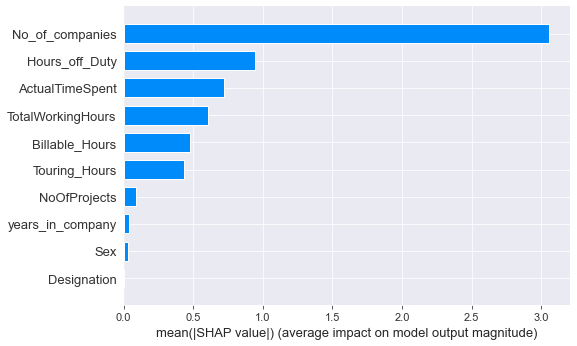

In [123]:
shap.summary_plot(shap_values_[1],X_train,plot_type='bar',show=False)

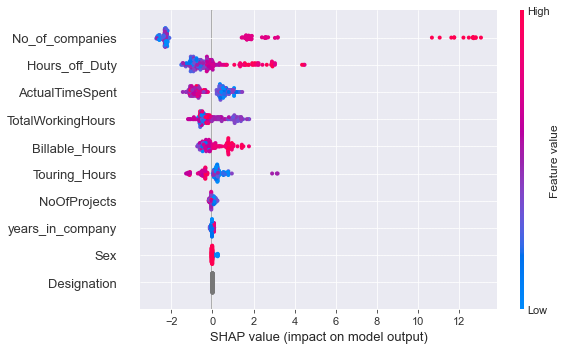

In [124]:
shap.summary_plot(shap_values_[1],X_train,show=False)

In [113]:
train_pred = lgb_grid.predict(X_train)
test_pred = lgb_grid.predict(X_test)

Metric_append('lgb_grid_train',y_train,train_pred)
Metric_append('lgb_grid_test',y_train,train_pred)
model_evaluation(y_train, train_pred, y_test, test_pred)


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       153
         1.0       1.00      1.00      1.00        18

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171


               CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        65
         1.0       1.00      0.67      0.80         9

    accuracy                           0.96        74
   macro avg       0.98      0.83      0.89        74
weighted avg       0.96      0.96      0.96        74



In [227]:
X_train.columns

Index(['TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent', 'Designation',
       'Sex', 'No_of_companies', 'years_in_company'],
      dtype='object')

In [1]:
os_data_X.columns

NameError: name 'os_data_X' is not defined

In [323]:
from lightgbm import LGBMClassifier
clf_lgb = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LGBMClassifier())])
param_grid= {'classifier__n_estimators': [100], 'classifier__class_weight':['balanced'], 
            'classifier__max_depth': [4,5,6,7], 'classifier__learning_rate':[0.2,0.22,0.25,0.3],
 'classifier__bagging_fraction': [0.8]}

lgb_grid2 = GridSearchCV(clf_lgb, param_grid= param_grid, cv= 5,n_jobs=6)

lgb_grid2.fit(X_train,y_train)






GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_trf',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('num_scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent', 'No_of_companies',
       'years_in_company'],...
                                                                                         ('cat_onehotencode',
                                        

In [115]:
train_pred = lgb_grid2.predict(X_train)
test_pred = lgb_grid2.predict(X_test)

Metric_append('lgb_grid2_train',y_train,train_pred)
Metric_append('lgb_grid2_test',y_test,test_pred)
model_evaluation(y_train, train_pred, y_test, test_pred)


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       153
         1.0       1.00      1.00      1.00        18

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171


               CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        65
         1.0       1.00      0.67      0.80         9

    accuracy                           0.96        74
   macro avg       0.98      0.83      0.89        74
weighted avg       0.96      0.96      0.96        74



In [116]:
Metric

,Model,Accuray,precision_class0,precision_class1,recall_class0,recall_class1,f1_class0,f1_class1
0,dt_grid_train,0.976608,0.974522,1.000,1.000000,0.777778,0.987097,0.875000
1,dt_grid_test,0.959459,0.955882,1.000,1.000000,0.666667,0.977444,0.800000
2,rf_grid_train,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,1.000000
3,rf_grid_test,0.959459,0.955882,1.000,1.000000,0.666667,0.977444,0.800000
4,rf_grid2_train,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,1.000000
5,rf_grid2_test,0.959459,0.955882,1.000,1.000000,0.666667,0.977444,0.800000
6,gbm_grid_train,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,1.000000
7,gbm_grid_test,0.959459,0.955882,1.000,1.000000,0.666667,0.977444,0.800000
8,gbm_grid_train,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,1.000000
9,gbm_grid_test,0.959459,0.955882,1.000,1.000000,0.666667,0.977444,0.800000


In [ ]:
Metric

# To drop rows in dataframe based on index

In [ ]:
Metric.drop(34,inplace=True)

In [ ]:
Metric

In [ ]:
clf = Pipeline(steps=[('Preprocessor', preprocessor)])
pl = clf.named_steps['Preprocessor']
catpl = pl.named_transformers_['cat_trf']
ohe = catpl.named_steps['cat_onehotencode']
ohe_features = ohe.get_feature_names()
print(ohe_features)
num_col=num_col.tolist()

In [218]:
os_data_y

,Left_Company
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
301,1.0
302,1.0
303,1.0
304,1.0


In [315]:
clf = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_pp = pd.DataFrame(clf.fit_transform(X_train))
X_test_pp = pd.DataFrame(clf.transform(X_test))

Use `SMOTE` from `imblearn.over_sampling` to balance the unbalanced data

In [316]:
smote = SMOTE(random_state=0)

os_data_X,os_data_y=smote.fit_sample(X_train_pp, y_train)

os_data_X = pd.DataFrame(data=os_data_X)
os_data_y= pd.DataFrame(data=os_data_y,columns=['Left_Company'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['Left_Company']==0]))
print("Number of subscription",len(os_data_y[os_data_y['Left_Company']==0]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['Left_Company']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Left_Company']==0])/len(os_data_X))

length of oversampled data is  306
Number of no subscription in oversampled data 153
Number of subscription 153
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [317]:
smote = SMOTE(random_state=0)

os_test_X,os_test_y=smote.fit_sample(X_test_pp, y_test)

os_test_X = pd.DataFrame(data=os_test_X)
os_test_y= pd.DataFrame(data=os_test_y,columns=['Left_Company'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_test_X))
print("Number of no subscription in oversampled data",len(os_test_y[os_test_y['Left_Company']==0]))
print("Number of subscription",len(os_test_y[os_test_y['Left_Company']==0]))
print("Proportion of no subscription data in oversampled data is ",len(os_test_y[os_test_y['Left_Company']==0])/len(os_test_X))
print("Proportion of subscription data in oversampled data is ",len(os_test_y[os_test_y['Left_Company']==0])/len(os_test_X))

length of oversampled data is  130
Number of no subscription in oversampled data 65
Number of subscription 65
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [ ]:
clf_xgb = XGBClassifier(n_jobs=-1)

param_grid = {
     'classifier__n_estimators':[100],
     'classifier__max_depth': [10],
    'classifier__learning_rate' : [0.001]
}

xgb_grid2 = GridSearchCV(clf_xgb, param_grid= param_grid, cv= 5,n_jobs=6)

xgb_grid2.fit(os_data_X,os_data_y)

In [321]:
%%time
clf_dt3 = DecisionTreeClassifier()

dt_param_grid = {'criterion': ['entropy']}

dt_grid3 = GridSearchCV(clf_dt3, param_grid=dt_param_grid, cv=5, n_jobs=-1)

dt_grid3.fit(os_data_X,os_data_y)

Wall time: 1.26 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy']})

In [229]:
clf = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_pp = pd.DataFrame(clf.fit_transform(X_train), columns = numcols)
X_test_pp = pd.DataFrame(clf.transform(X_test),columns = numcols)

In [230]:
smote = SMOTE(random_state=0)

os_data_X,os_data_y=smote.fit_sample(X_train_pp, y_train)

os_data_X = pd.DataFrame(data=os_data_X)
os_data_y= pd.DataFrame(data=os_data_y,columns=['Left_Company'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['Left_Company']==0]))
print("Number of subscription",len(os_data_y[os_data_y['Left_Company']==0]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['Left_Company']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['Left_Company']==0])/len(os_data_X))

length of oversampled data is  306
Number of no subscription in oversampled data 153
Number of subscription 153
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [231]:
smote = SMOTE(random_state=0)

os_test_X,os_test_y=smote.fit_sample(X_test_pp, y_test)

os_test_X = pd.DataFrame(data=os_test_X)
os_test_y= pd.DataFrame(data=os_test_y,columns=['Left_Company'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_test_X))
print("Number of no subscription in oversampled data",len(os_test_y[os_test_y['Left_Company']==0]))
print("Number of subscription",len(os_test_y[os_test_y['Left_Company']==0]))
print("Proportion of no subscription data in oversampled data is ",len(os_test_y[os_test_y['Left_Company']==0])/len(os_test_X))
print("Proportion of subscription data in oversampled data is ",len(os_test_y[os_test_y['Left_Company']==0])/len(os_test_X))

length of oversampled data is  130
Number of no subscription in oversampled data 65
Number of subscription 65
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [326]:
%%time
clf_dt2 = DecisionTreeClassifier()

dt_param_grid = {'criterion': ['entropy'], 'max_depth': [10], 
                 "min_samples_split": [20],"min_samples_leaf": [10]}

dt_grid3 = GridSearchCV(clf_dt2, param_grid=dt_param_grid, cv=5, n_jobs=-1)

dt_grid3.fit(os_data_X,os_data_y)

Wall time: 2.32 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10],
                         'min_samples_leaf': [10], 'min_samples_split': [20]})

In [234]:
os_data_X.columns

Index(['TotalWorkingHours', 'Billable_Hours', 'Hours_off_Duty',
       'Touring_Hours', 'NoOfProjects', 'ActualTimeSpent', 'No_of_companies',
       'years_in_company', 'x0_EVP', 'x0_Junior', 'x0_MD', 'x0_Senior',
       'x0_VP', 'x1_0', 'x1_1'],
      dtype='object')

In [327]:
%%time
clf_dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

dt_param_grid = {'classifier__criterion': ['entropy'],
 'classifier__max_depth': [6],
 'classifier__min_samples_leaf': [10],
 'classifier__min_samples_split': [2]}

dt_grid = GridSearchCV(clf_dt, param_grid=dt_param_grid, cv=5,verbose=3)

dt_grid.fit(os_data_X,os_data_y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] classifier__criterion=entropy, classifier__max_depth=6, classifier__min_samples_leaf=10, classifier__min_samples_split=2 
[CV]  classifier__criterion=entropy, classifier__max_depth=6, classifier__min_samples_leaf=10, classifier__min_samples_split=2, score=nan, total=   0.0s
[CV] classifier__criterion=entropy, classifier__max_depth=6, classifier__min_samples_leaf=10, classifier__min_samples_split=2 
[CV]  classifier__criterion=entropy, classifier__max_depth=6, classifier__min_samples_leaf=10, classifier__min_samples_split=2, score=nan, total=   0.0s
[CV] classifier__criterion=entropy, classifier__max_depth=6, classifier__min_samples_leaf=10, classifier__min_samples_split=2 
[CV]  classifier__criterion=entropy, classifier__max_depth=6, classifier__min_samples_leaf=10, classifier__min_samples_split=2, score=nan, total=   0.0s
[CV] classifier__criterion=entropy, classifier__max_depth=6, classifier__min_samples_leaf=10, classif

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


ValueError: A given column is not a column of the dataframe

In [205]:
train_pred = dt_grid_bal.predict(os_data_X)
test_pred = dt_grid_bal.predict(os_test_X)

Metric_append('dt_grid_bal_train',os_data_y,train_pred)
Metric_append('dt_grid_bal_test',os_test_y,test_pred)
model_evaluation(os_data_y, train_pred, os_test_y, test_pred)


               CLASSIFICATION REPORT FOR TRAIN DATA
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       153
         1.0       1.00      1.00      1.00       153

    accuracy                           1.00       306
   macro avg       1.00      1.00      1.00       306
weighted avg       1.00      1.00      1.00       306


               CLASSIFICATION REPORT FOR TEST DATA
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        65
         1.0       0.98      0.95      0.97        65

    accuracy                           0.97       130
   macro avg       0.97      0.97      0.97       130
weighted avg       0.97      0.97      0.97       130



In [213]:
X_unseen_pp = pd.DataFrame(clf.transform(test_data))
#X_test_pp = pd.DataFrame(clf.transform(X_test),columns = numcols )

In [ ]:
y_pred_dt=dt_grid_bal.predict(X_unseen_pp)
test_attr['Left_Company']=y_pred_dt
test_attr.to_csv('MITH_7.csv')

In [ ]:
y_pred_XGB=xgb_grid2.predict(test_data)
test_attr['Left_Company']=y_pred_XGB
test_attr.to_csv('MITH_8.csv')

In [209]:
clf = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_pp = pd.DataFrame(clf.fit_transform(X_train))
X_test_pp = pd.DataFrame(clf.transform(X_test))

In [210]:
smote = SMOTE(random_state=0)

os_data_X,os_data_y=smote.fit_sample(X_train_pp, y_train)

os_data_X = pd.DataFrame(data=os_data_X)
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']=='no']))
print("Number of subscription",len(os_data_y[os_data_y['y']=='yes']))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']=='no'])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']=='yes'])/len(os_data_X))

length of oversampled data is  306
Number of no subscription in oversampled data 0
Number of subscription 0
Proportion of no subscription data in oversampled data is  0.0
Proportion of subscription data in oversampled data is  0.0


In [211]:
smote = SMOTE(random_state=0)

os_test_X,os_test_y=smote.fit_sample(X_test_pp, y_test)

os_test_X = pd.DataFrame(data=os_test_X)
os_test_y= pd.DataFrame(data=os_test_y,columns=['Left_Company'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_test_X))
print("Number of no subscription in oversampled data",len(os_test_y[os_test_y['Left_Company']==0]))
print("Number of subscription",len(os_test_y[os_test_y['Left_Company']==0]))
print("Proportion of no subscription data in oversampled data is ",len(os_test_y[os_test_y['Left_Company']==0])/len(os_test_X))
print("Proportion of subscription data in oversampled data is ",len(os_test_y[os_test_y['Left_Company']==0])/len(os_test_X))

length of oversampled data is  130
Number of no subscription in oversampled data 65
Number of subscription 65
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [ ]:
%%time
clf_dt = Pipeline(steps=[('classifier', DecisionTreeClassifier())])

dt_param_grid = {'classifier__criterion': ['entropy', 'gini'], 'classifier__max_depth': [6,8,10,12], 
                 "classifier__min_samples_split": [2, 10, 20],"classifier__min_samples_leaf": [1, 5, 10]}

dt_grid_bal = GridSearchCV(clf_dt, param_grid=dt_param_grid, cv=5, n_jobs=-1)

dt_grid_bal.fit(os_data_X,os_data_y)

In [ ]:
train_pred = dt_grid_bal.predict(os_data_X)
test_pred = dt_grid_bal.predict(X_test_pp)

print(dt_grid_bal.score(os_data_X, os_data_y))
print(dt_grid_bal.score(X_test_pp, y_test))

In [46]:
metric

,Model,Accuray,precision_class0,precision_class1,recall_class0,recall_class1,f1_class0,f1_class1
0,logistic_train,0.936,1.000,0.621,0.928,1.000,0.963,0.766
1,logistic_test,0.878,0.952,0.500,0.908,0.667,0.929,0.571
2,NB_train,0.918,0.948,0.625,0.961,0.556,0.955,0.588
3,NB_test,0.919,0.928,0.800,0.985,0.444,0.955,0.571
4,KNN_train,1.000,1.000,1.000,1.000,1.000,1.000,1.000
5,KNN_test,0.946,0.942,1.000,1.000,0.556,0.970,0.714
6,DT_train,0.942,1.000,0.643,0.935,1.000,0.966,0.783
7,DT_test,0.919,0.968,0.636,0.938,0.778,0.953,0.700
8,RF_train,0.994,0.994,1.000,1.000,0.944,0.997,0.971
9,RF_test,0.959,0.956,1.000,1.000,0.667,0.977,0.800
